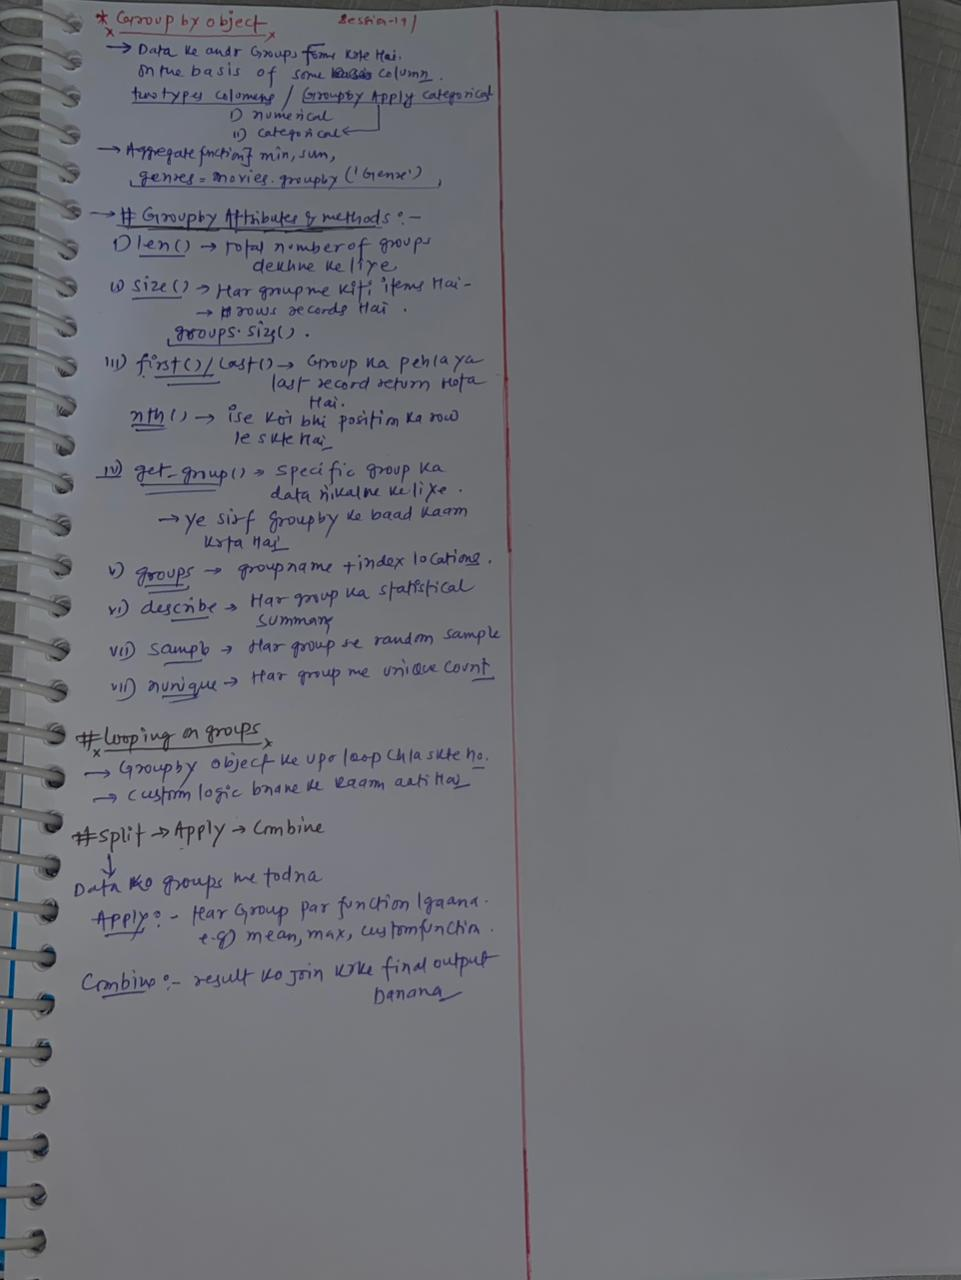

# Groupby object
---

# **GroupBy Object – Attributes & Methods (Interview Friendly)**

## **📌 What is GroupBy?**

**GroupBy** in pandas is used to **split data into groups**, **apply a function**, and **combine results**.
Useful for **summaries, statistics, and category-wise analysis**.

---

## **🟦 GroupBy Attributes & Methods**

| Type      | Attribute / Method          | Simple Definition                                            |
| --------- | --------------------------- | ------------------------------------------------------------ |
| Attribute | `g.ngroups`                 | Number of groups formed                                      |
| Attribute | `g.groups`                  | Shows group names and corresponding row indexes              |
| Method    | `g.size()`                  | Number of rows in each group                                 |
| Method    | `g.count()`                 | Counts non-null values in each group                         |
| Method    | `g.first()`                 | Returns the first row from each group                        |
| Method    | `g.last()`                  | Returns the last row from each group                         |
| Method    | `g.nth(n)`                  | Returns the nth row from each group                          |
| Method    | `g.get_group('A')`          | Returns all rows of a specific group                         |
| Method    | `g.mean()`                  | Average of numerical columns per group                       |
| Method    | `g.sum()`                   | Sum of numerical columns per group                           |
| Method    | `g.min()`                   | Minimum value per group                                      |
| Method    | `g.max()`                   | Maximum value per group                                      |
| Method    | `g.describe()`              | Summary statistics per group                                 |
| Method    | `g.sample()`                | Random sample from each group                                |
| Method    | `g.nunique()`               | Count of unique values per group                             |
| Method    | `g.apply(func)`             | Apply custom or built-in function to each group              |
| Method    | `g.aggregate()` / `g.agg()` | Apply multiple functions at once (e.g., sum, mean)           |
| Method    | `g.transform()`             | Return results aligned with original DataFrame (broadcasted) |

---
### ✔ What happens in GroupBy?

**Split → Apply → Combine**

* **Split:** Divide DataFrame based on a column
* **Apply:** Perform a function (sum, mean, custom)
* **Combine:** Merge results back

### ✔ Difference between `apply`, `agg`, `transform`

| Method        | Best For                           | Output Shape          |
| ------------- | ---------------------------------- | --------------------- |
| `agg()`       | Multiple summaries                 | Smaller result        |
| `apply()`     | Custom logic                       | Depends on logic      |
| `transform()` | Broadcast results to original size | Same size as original |

### ✔ `get_group()` vs Filtering

* `get_group('A')` → uses groupby object (faster)
* `df[df['col']=='A']` → normal filtering


In [1]:
import numpy as np
import pandas as pd

In [2]:
movies=pd.read_csv('imdb-top-1000.csv')

In [9]:
movies.head(5)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
3,The Godfather: Part II,1974,202,Crime,9.0,Francis Ford Coppola,Al Pacino,1129952,57300000.0,90.0
4,12 Angry Men,1957,96,Crime,9.0,Sidney Lumet,Henry Fonda,689845,4360000.0,96.0


In [6]:
movies.shape

(1000, 10)

In [12]:
genres=movies.groupby('Genre')

In [17]:
# Applying builtin aggregation fuctions on groupby objects
genres.mean(numeric_only=True)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,420246.581395,1.897224e+08,73.419580
Adventure,134.111111,7.937500,313557.819444,1.319017e+08,78.437500
Animation,99.585366,7.930488,268032.073171,1.784326e+08,81.093333
Biography,136.022727,7.938636,272805.045455,9.404952e+07,76.240506
Comedy,112.129032,7.901290,178195.658065,1.010572e+08,78.720000
Crime,126.392523,8.016822,313398.271028,7.899656e+07,77.080460
Drama,124.737024,7.957439,212343.612457,1.225259e+08,79.701245
Family,107.500000,7.800000,275610.500000,2.195553e+08,79.000000
Fantasy,85.000000,8.000000,73111.000000,3.913633e+08,NaN


In [19]:
# find the top 3 genres by total earning
movies.groupby('Genre').sum()['Gross'].sort_values(ascending=False)

Genre
Drama        3.540997e+10
Action       3.263226e+10
Comedy       1.566387e+10
Animation    1.463147e+10
Adventure    9.496922e+09
Crime        8.452632e+09
Biography    8.276358e+09
Mystery      1.256417e+09
Horror       1.034649e+09
Fantasy      7.827267e+08
Family       4.391106e+08
Film-Noir    1.259105e+08
Western      5.822151e+07
Thriller     1.755074e+07
Name: Gross, dtype: float64

In [20]:
movies.groupby('Genre').sum()['Gross'].sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [23]:
# 2nd trika
movies.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(3)

Genre
Drama     3.540997e+10
Action    3.263226e+10
Comedy    1.566387e+10
Name: Gross, dtype: float64

In [26]:
# find the genre with highest avg IMDB rating
movies.groupby('Genre')['IMDB_Rating'].mean()

Genre
Action       7.949419
Adventure    7.937500
Animation    7.930488
Biography    7.938636
Comedy       7.901290
Crime        8.016822
Drama        7.957439
Family       7.800000
Fantasy      8.000000
Film-Noir    7.966667
Horror       7.909091
Mystery      7.975000
Thriller     7.800000
Western      8.350000
Name: IMDB_Rating, dtype: float64

In [27]:
movies.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False).head(3)

Genre
Western    8.350000
Crime      8.016822
Fantasy    8.000000
Name: IMDB_Rating, dtype: float64

In [29]:
# find director with most popularity
movies.groupby('Director')['No_of_Votes'].sum()

Director
Aamir Khan              168895
Aaron Sorkin             89896
Abdellatif Kechiche     138741
Abhishek Chaubey         27175
Abhishek Kapoor          32628
                        ...   
Zack Snyder            1233675
Zaza Urushadze           40382
Zoya Akhtar              99813
Çagan Irmak              78925
Ömer Faruk Sorak         56960
Name: No_of_Votes, Length: 548, dtype: int64

In [30]:
movies.groupby('Director')['No_of_Votes'].sum().sort_values(ascending=False).head(1)

Director
Christopher Nolan    11578345
Name: No_of_Votes, dtype: int64

In [31]:
# find the highest rated movie of each genre
movies.groupby('Genre')['IMDB_Rating'].max()

Genre
Action       9.0
Adventure    8.6
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.2
Drama        9.3
Family       7.8
Fantasy      8.1
Film-Noir    8.1
Horror       8.5
Mystery      8.4
Thriller     7.8
Western      8.8
Name: IMDB_Rating, dtype: float64

In [32]:
# find number of movies done by each actor
movies['Star1'].value_counts()

Star1
Tom Hanks            12
Robert De Niro       11
Clint Eastwood       10
Al Pacino            10
Leonardo DiCaprio     9
                     ..
Phil Harris           1
David Hemmings        1
John Lennon           1
Tallulah Bankhead     1
Bruce Lee             1
Name: count, Length: 660, dtype: int64

In [34]:
movies.groupby('Star1')['Series_Title'].count().sort_values(ascending=False)

Star1
Tom Hanks               12
Robert De Niro          11
Al Pacino               10
Clint Eastwood          10
Leonardo DiCaprio        9
                        ..
Zbigniew Zamachowski     1
Zooey Deschanel          1
Çetin Tekindor           1
Éric Toledano            1
Ajay Devgn               1
Name: Series_Title, Length: 660, dtype: int64

In [35]:
# GroupBy Attributes and Methods
# find total number of groups -> len
# find items in each group -> size
# first()/last() -> nth item
# get_group -> vs filtering
# groups
# describe
# sample
# nunique

In [37]:
# find total number of groups -> len
len(movies.groupby('Genre'))

14

In [39]:
movies['Genre'].nunique()

14

In [40]:
# find items in each group -> size
movies.groupby('Genre').size()

Genre
Action       172
Adventure     72
Animation     82
Biography     88
Comedy       155
Crime        107
Drama        289
Family         2
Fantasy        2
Film-Noir      3
Horror        11
Mystery       12
Thriller       1
Western        4
dtype: int64

In [41]:
movies['Genre'].value_counts()

Genre
Drama        289
Action       172
Comedy       155
Crime        107
Biography     88
Animation     82
Adventure     72
Mystery       12
Horror        11
Western        4
Film-Noir      3
Fantasy        2
Family         2
Thriller       1
Name: count, dtype: int64

In [42]:
# first()/last() -> nth item
genres=movies.groupby('Genre')
genres.first()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,The Dark Knight,2008,152,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
Adventure,Interstellar,2014,169,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
Animation,Sen to Chihiro no kamikakushi,2001,125,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
Biography,Schindler's List,1993,195,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
Comedy,Gisaengchung,2019,132,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
Crime,The Godfather,1972,175,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
Drama,The Shawshank Redemption,1994,142,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
Family,E.T. the Extra-Terrestrial,1982,115,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN


In [43]:
genres.last()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,Escape from Alcatraz,1979,112,7.6,Don Siegel,Clint Eastwood,121731,43000000.0,76.0
Adventure,Kelly's Heroes,1970,144,7.6,Brian G. Hutton,Clint Eastwood,45338,1378435.0,50.0
Animation,The Jungle Book,1967,78,7.6,Wolfgang Reitherman,Phil Harris,166409,141843612.0,65.0
Biography,Midnight Express,1978,121,7.6,Alan Parker,Brad Davis,73662,35000000.0,59.0
Comedy,Breakfast at Tiffany's,1961,115,7.6,Blake Edwards,Audrey Hepburn,166544,679874270.0,76.0
Crime,The 39 Steps,1935,86,7.6,Alfred Hitchcock,Robert Donat,51853,302787539.0,93.0
Drama,Lifeboat,1944,97,7.6,Alfred Hitchcock,Tallulah Bankhead,26471,852142728.0,78.0
Family,Willy Wonka & the Chocolate Factory,1971,100,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Nosferatu,1922,94,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [44]:
genres.nth(6)

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
16,Star Wars: Episode V - The Empire Strikes Back,1980,124,Action,8.7,Irvin Kershner,Mark Hamill,1159315,290475067.0,82.0
27,Se7en,1995,127,Crime,8.6,David Fincher,Morgan Freeman,1445096,100125643.0,65.0
32,It's a Wonderful Life,1946,130,Drama,8.6,Frank Capra,James Stewart,405801,82385199.0,89.0
66,WALL·E,2008,98,Animation,8.4,Andrew Stanton,Ben Burtt,999790,223808164.0,95.0
83,The Great Dictator,1940,125,Comedy,8.4,Charles Chaplin,Charles Chaplin,203150,288475.0,NaN
102,Braveheart,1995,178,Biography,8.3,Mel Gibson,Mel Gibson,959181,75600000.0,68.0
118,North by Northwest,1959,136,Adventure,8.3,Alfred Hitchcock,Cary Grant,299198,13275000.0,98.0
420,Sleuth,1972,138,Mystery,8.0,Joseph L. Mankiewicz,Laurence Olivier,44748,4081254.0,NaN
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0


In [45]:
# get_group -> vs filtering
genres.get_group('Horror')

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
49,Psycho,1960,109,Horror,8.5,Alfred Hitchcock,Anthony Perkins,604211,32000000.0,97.0
75,Alien,1979,117,Horror,8.4,Ridley Scott,Sigourney Weaver,787806,78900000.0,89.0
271,The Thing,1982,109,Horror,8.1,John Carpenter,Kurt Russell,371271,13782838.0,57.0
419,The Exorcist,1973,122,Horror,8.0,William Friedkin,Ellen Burstyn,362393,232906145.0,81.0
544,Night of the Living Dead,1968,96,Horror,7.9,George A. Romero,Duane Jones,116557,89029.0,89.0
707,The Innocents,1961,100,Horror,7.8,Jack Clayton,Deborah Kerr,27007,2616000.0,88.0
724,Get Out,2017,104,Horror,7.7,Jordan Peele,Daniel Kaluuya,492851,176040665.0,85.0
844,Halloween,1978,91,Horror,7.7,John Carpenter,Donald Pleasence,233106,47000000.0,87.0
876,The Invisible Man,1933,71,Horror,7.7,James Whale,Claude Rains,30683,298791505.0,87.0
932,Saw,2004,103,Horror,7.6,James Wan,Cary Elwes,379020,56000369.0,46.0


In [46]:
genres.get_group('Fantasy')

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
568,Nosferatu,1922,94,Fantasy,7.9,F.W. Murnau,Max Schreck,88794,445151978.0,NaN


In [50]:
# groups
genres.groups

{'Action': [2, 5, 8, 10, 13, 14, 16, 29, 30, 31, 39, 42, 44, 55, 57, 59, 60, 63, 68, 72, 106, 109, 129, 130, 134, 140, 142, 144, 152, 155, 160, 161, 166, 168, 171, 172, 177, 181, 194, 201, 202, 216, 217, 223, 224, 236, 241, 262, 275, 294, 308, 320, 325, 326, 331, 337, 339, 340, 343, 345, 348, 351, 353, 356, 357, 362, 368, 369, 375, 376, 390, 410, 431, 436, 473, 477, 479, 482, 488, 493, 496, 502, 507, 511, 532, 535, 540, 543, 564, 569, 570, 573, 577, 582, 583, 602, 605, 608, 615, 623, ...], 'Adventure': [21, 47, 93, 110, 114, 116, 118, 137, 178, 179, 191, 193, 209, 226, 231, 247, 267, 273, 281, 300, 301, 304, 306, 323, 329, 361, 366, 377, 402, 406, 415, 426, 458, 470, 497, 498, 506, 513, 514, 537, 549, 552, 553, 566, 576, 604, 609, 618, 638, 647, 675, 681, 686, 692, 711, 713, 739, 755, 781, 797, 798, 851, 873, 884, 912, 919, 947, 957, 964, 966, 984, 991], 'Animation': [23, 43, 46, 56, 58, 61, 66, 70, 101, 135, 146, 151, 158, 170, 197, 205, 211, 213, 219, 229, 230, 242, 245, 246, 270, 33

In [56]:
# describe
genres.describe()

Runtime                                                              \
            count        mean        std    min     25%    50%     75%    max   
Genre                                                                           
Action      172.0  129.046512  28.500706   45.0  110.75  127.5  143.25  321.0   
Adventure    72.0  134.111111  33.317320   88.0  109.00  127.0  149.00  228.0   
Animation    82.0   99.585366  14.530471   71.0   90.00   99.5  106.75  137.0   
Biography    88.0  136.022727  25.514466   93.0  120.00  129.0  146.25  209.0   
Comedy      155.0  112.129032  22.946213   68.0   96.00  106.0  124.50  188.0   
Crime       107.0  126.392523  27.689231   80.0  106.50  122.0  141.50  229.0   
Drama       289.0  124.737024  27.740490   64.0  105.00  121.0  137.00  242.0   
Family        2.0  107.500000  10.606602  100.0  103.75  107.5  111.25  115.0   
Fantasy       2.0   85.000000  12.727922   76.0   80.50   85.0   89.50   94.0   
Film-Noir     3.0  104.000000   4.000000  100.0  102.00  104.0  106.00  108.0   
Horror       11.0  102.090909  13.604812   71.0   98.00  103.0  109.00  122.0   
Mystery      12.0  119.083333  14.475423   96.0  110.75  117.5  130.25  138.0   
Thriller      1.0  108.000000        NaN  108.0  108.00  108.0  108.00  108.0   
Western       4.0  148.250000  17.153717  132.0  134.25  148.0  162.00  165.0   

          IMDB_Rating            ...         Gross              Metascore  \
                count      mean  ...           75%          max     count   
Genre                            ...                                        
Action          172.0  7.949419  ...  2.674437e+08  936662225.0     143.0   
Adventure        72.0  7.937500  ...  1.998070e+08  874211619.0      64.0   
Animation        82.0  7.930488  ...  2.520612e+08  873839108.0      75.0   
Biography        88.0  7.938636  ...  9.829924e+07  753585104.0      79.0   
Comedy          155.0  7.901290  ...  8.107809e+07  886752933.0     125.0   
Crime           107.0  8.016822  ...  7.102163e+07  790482117.0      87.0   
Drama           289.0  7.957439  ...  1.164461e+08  924558264.0     241.0   
Family            2.0  7.800000  ...  3.273329e+08  435110554.0       2.0   
Fantasy           2.0  8.000000  ...  4.182577e+08  445151978.0       0.0   
Film-Noir         3.0  7.966667  ...  6.273068e+07  123353292.0       3.0   
Horror           11.0  7.909091  ...  1.362817e+08  298791505.0      11.0   
Mystery          12.0  7.975000  ...  1.310949e+08  474203697.0       8.0   
Thriller          1.0  7.800000  ...  1.755074e+07   17550741.0       1.0   
Western           4.0  8.350000  ...  1.920000e+07   31800000.0       4.0   

                                                                  
                mean        std   min    25%   50%    75%    max  
Genre                                                             
Action     73.419580  12.421252  33.0  65.00  74.0  82.00   98.0  
Adventure  78.437500  12.345393  41.0  69.75  80.5  87.25  100.0  
Animation  81.093333   8.813646  61.0  75.00  82.0  87.50   96.0  
Biography  76.240506  11.028187  48.0  70.50  76.0  84.50   97.0  
Comedy     78.720000  11.829160  45.0  72.00  79.0  88.00   99.0  
Crime      77.080460  13.099102  47.0  69.50  77.0  87.00  100.0  
Drama      79.701245  12.744687  28.0  72.00  82.0  89.00  100.0  
Family     79.000000  16.970563  67.0  73.00  79.0  85.00   91.0  
Fantasy          NaN        NaN   NaN    NaN   NaN    NaN    NaN  
Film-Noir  95.666667   1.527525  94.0  95.00  96.0  96.50   97.0  
Horror     80.000000  15.362291  46.0  77.50  87.0  88.50   97.0  
Mystery    79.125000  18.604435  52.0  65.25  77.0  98.50  100.0  
Thriller   81.000000        NaN  81.0  81.00  81.0  81.00   81.0  
Western    78.250000   9.032349  69.0  72.75  77.0  82.50   90.0  

[14 rows x 40 columns]

In [58]:
# sample
genres.sample()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
777,The Bourne Supremacy,2004,108,Action,7.7,Paul Greengrass,Matt Damon,434841,176241941.0,73.0
406,The Princess Bride,1987,98,Adventure,8.0,Rob Reiner,Cary Elwes,393899,30857814.0,77.0
170,Tonari no Totoro,1988,86,Animation,8.2,Hayao Miyazaki,Hitoshi Takagi,291180,1105564.0,86.0
243,Catch Me If You Can,2002,141,Biography,8.1,Steven Spielberg,Leonardo DiCaprio,832846,164615351.0,75.0
848,Blazing Saddles,1974,93,Comedy,7.7,Mel Brooks,Cleavon Little,125993,119500000.0,73.0
180,To Kill a Mockingbird,1962,129,Crime,8.2,Robert Mulligan,Gregory Peck,293811,504340883.0,88.0
324,Airlift,2016,130,Drama,8.0,Raja Menon,Akshay Kumar,52897,96927481.0,NaN
688,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
321,Das Cabinet des Dr. Caligari,1920,76,Fantasy,8.1,Robert Wiene,Werner Krauss,57428,337574718.0,NaN
309,The Third Man,1949,104,Film-Noir,8.1,Carol Reed,Orson Welles,158731,449191.0,97.0


In [59]:
# nunique
genres.nunique()

,Series_Title,Released_Year,Runtime,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,
Action,172,61,78,15,123,121,172,172,50
Adventure,72,49,58,10,59,59,72,72,33
Animation,82,35,41,11,51,77,82,82,29
Biography,88,44,56,13,76,72,88,88,40
Comedy,155,72,70,11,113,133,155,155,44
Crime,106,56,65,14,86,85,107,107,39
Drama,289,83,95,14,211,250,288,287,52
Family,2,2,2,1,2,2,2,2,2
Fantasy,2,2,2,2,2,2,2,2,0


In [61]:
# agg method
# passing dict
genres.agg(
    {
        'Runtime':'mean',
        'IMDB_Rating':'mean',
        'No_of_Votes':'sum',
        'Gross':'sum',
        'Metascore':'min'
    }
)

,Runtime,IMDB_Rating,No_of_Votes,Gross,Metascore
Genre,,,,,
Action,129.046512,7.949419,72282412,3.263226e+10,33.0
Adventure,134.111111,7.937500,22576163,9.496922e+09,41.0
Animation,99.585366,7.930488,21978630,1.463147e+10,61.0
Biography,136.022727,7.938636,24006844,8.276358e+09,48.0
Comedy,112.129032,7.901290,27620327,1.566387e+10,45.0
Crime,126.392523,8.016822,33533615,8.452632e+09,47.0
Drama,124.737024,7.957439,61367304,3.540997e+10,28.0
Family,107.500000,7.800000,551221,4.391106e+08,67.0
Fantasy,85.000000,8.000000,146222,7.827267e+08,NaN


In [63]:
# passing list
genres.agg(['min','max','sum'])

Series_Title  \
                                       min   
Genre                                        
Action                                 300   
Adventure            2001: A Space Odyssey   
Animation                            Akira   
Biography                 12 Years a Slave   
Comedy                (500) Days of Summer   
Crime                         12 Angry Men   
Drama                                 1917   
Family          E.T. the Extra-Terrestrial   
Fantasy       Das Cabinet des Dr. Caligari   
Film-Noir                Shadow of a Doubt   
Horror                               Alien   
Mystery                          Dark City   
Thriller                   Wait Until Dark   
Western    Il buono, il brutto, il cattivo   

                                                \
                                           max   
Genre                                            
Action                                 Yôjinbô   
Adventure                           Zombieland   
Animation          Ôkami kodomo no Ame to Yuki   
Biography                              Zerkalo   
Comedy                Zindagi Na Milegi Dobara   
Crime                        À bout de souffle   
Drama                                Zwartboek   
Family     Willy Wonka & the Chocolate Factory   
Fantasy                              Nosferatu   
Film-Noir                        The Third Man   
Horror                               The Thing   
Mystery                                Vertigo   
Thriller                       Wait Until Dark   
Western                 The Outlaw Josey Wales   

                                                             Released_Year  \
                                                         sum           min   
Genre                                                                        
Action     The Dark KnightThe Lord of the Rings: The Retu...          1924   
Adventure  InterstellarBack to the FutureInglourious Bast...          1925   
Animation  Sen to Chihiro no kamikakushiThe Lion KingHota...          1940   
Biography  Schindler's ListGoodfellasHamiltonThe Intoucha...          1928   
Comedy     GisaengchungLa vita è bellaModern TimesCity Li...          1921   
Crime      The GodfatherThe Godfather: Part II12 Angry Me...          1931   
Drama      The Shawshank RedemptionFight ClubForrest Gump...          1925   
Family     E.T. the Extra-TerrestrialWilly Wonka & the Ch...          1971   
Fantasy                Das Cabinet des Dr. CaligariNosferatu          1920   
Film-Noir   The Third ManThe Maltese FalconShadow of a Doubt          1941   
Horror     PsychoAlienThe ThingThe ExorcistNight of the L...          1933   
Mystery    MementoRear WindowVertigoShutter IslandKahaani...          1938   
Thriller                                     Wait Until Dark          1967   
Western    Il buono, il brutto, il cattivoOnce Upon a Tim...          1965   

                                                                   Runtime  \
            max                                                sum     min   
Genre                                                                        
Action     2019  2008200320102001200219991980197719621954200019...      45   
Adventure    PG  2014198520091981196819621959201319751963194819...      88   
Animation  2020  2001199419882016201820172008199719952019200920...      71   
Biography  2020  1993199020202011200220171995198420182013201320...      93   
Comedy     2020  2019199719361931200919641940200120001973196019...      68   
Crime      2019  1972197419571994200219991995199120192006199519...      80   
Drama      2020  1994199919941975202019981946201420061998198819...      64   
Family     1982                                           19821971     100   
Fantasy    1922                                           19201922      76   
Film-Noir  1949                                       194919411943     100   
Horror     2017       196019791982197319681961201719781

In [65]:
## Adding both the syntax
genres.agg(
    {
        'Runtime':['mean','min'],
        'IMDB_Rating':'mean',
        'No_of_Votes':['sum','max'],
        'Gross':'sum',
        'Metascore':'min'
    }
)

Runtime      IMDB_Rating No_of_Votes                  Gross  \
                 mean  min        mean         sum      max           sum   
Genre                                                                       
Action     129.046512   45    7.949419    72282412  2303232  3.263226e+10   
Adventure  134.111111   88    7.937500    22576163  1512360  9.496922e+09   
Animation   99.585366   71    7.930488    21978630   999790  1.463147e+10   
Biography  136.022727   93    7.938636    24006844  1213505  8.276358e+09   
Comedy     112.129032   68    7.901290    27620327   939631  1.566387e+10   
Crime      126.392523   80    8.016822    33533615  1826188  8.452632e+09   
Drama      124.737024   64    7.957439    61367304  2343110  3.540997e+10   
Family     107.500000  100    7.800000      551221   372490  4.391106e+08   
Fantasy     85.000000   76    8.000000      146222    88794  7.827267e+08   
Film-Noir  104.000000  100    7.966667      367215   158731  1.259105e+08   
Horror     102.090909   71    7.909091     3742556   787806  1.034649e+09   
Mystery    119.083333   96    7.975000     4203004  1129894  1.256417e+09   
Thriller   108.000000  108    7.800000       27733    27733  1.755074e+07   
Western    148.250000  132    8.350000     1289665   688390  5.822151e+07   

          Metascore  
                min  
Genre                
Action         33.0  
Adventure      41.0  
Animation      61.0  
Biography      48.0  
Comedy         45.0  
Crime          47.0  
Drama          28.0  
Family         67.0  
Fantasy         NaN  
Film-Noir      94.0  
Horror         46.0  
Mystery        52.0  
Thriller       81.0  
Western        69.0

In [66]:
## looping on groups
for group,data in genres:
    print(type(group),type(data))

<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>
<class 'str'> <class 'pandas.core.frame.DataFrame'>


In [67]:
for group,data in genres:
    print(data)

                                          Series_Title Released_Year  Runtime  \
2                                      The Dark Knight          2008      152   
5        The Lord of the Rings: The Return of the King          2003      201   
8                                            Inception          2010      148   
10   The Lord of the Rings: The Fellowship of the Ring          2001      178   
13               The Lord of the Rings: The Two Towers          2002      179   
..                                                 ...           ...      ...   
968                                       Falling Down          1993      113   
979                                      Lethal Weapon          1987      109   
982                                          Mad Max 2          1981       96   
983                                       The Warriors          1979       92   
985                               Escape from Alcatraz          1979      112   

      Genre  IMDB_Rating   

In [69]:
dfs = []
for group, data in genres:
    dfs.append(data[data["IMDB_Rating"] == data["IMDB_Rating"].max()])

df = pd.concat(dfs)
df


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
2,The Dark Knight,2008,152,Action,9.0,Christopher Nolan,Christian Bale,2303232,534858444.0,84.0
21,Interstellar,2014,169,Adventure,8.6,Christopher Nolan,Matthew McConaughey,1512360,188020017.0,74.0
23,Sen to Chihiro no kamikakushi,2001,125,Animation,8.6,Hayao Miyazaki,Daveigh Chase,651376,10055859.0,96.0
7,Schindler's List,1993,195,Biography,8.9,Steven Spielberg,Liam Neeson,1213505,96898818.0,94.0
19,Gisaengchung,2019,132,Comedy,8.6,Bong Joon Ho,Kang-ho Song,552778,53367844.0,96.0
26,La vita è bella,1997,116,Comedy,8.6,Roberto Benigni,Roberto Benigni,623629,57598247.0,59.0
1,The Godfather,1972,175,Crime,9.2,Francis Ford Coppola,Marlon Brando,1620367,134966411.0,100.0
0,The Shawshank Redemption,1994,142,Drama,9.3,Frank Darabont,Tim Robbins,2343110,28341469.0,80.0
688,E.T. the Extra-Terrestrial,1982,115,Family,7.8,Steven Spielberg,Henry Thomas,372490,435110554.0,91.0
698,Willy Wonka & the Chocolate Factory,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0


In [70]:
# split(apply) combine
# appply (builin functin)
genres.apply(min)

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_18180\3095657517.py:3: FutureWarning: The provided callable <built-in function min> is currently using np.minimum.reduce. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string np.minimum.reduce instead.
  genres.apply(min)
C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_18180\3095657517.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(min)


,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
Genre,,,,,,,,,,
Action,300,1924,45,Action,7.6,Abhishek Chaubey,Aamir Khan,25312,3296.0,NaN
Adventure,2001: A Space Odyssey,1925,88,Adventure,7.6,Akira Kurosawa,Aamir Khan,29999,61001.0,NaN
Animation,Akira,1940,71,Animation,7.6,Adam Elliot,Adrian Molina,25229,128985.0,NaN
Biography,12 Years a Slave,1928,93,Biography,7.6,Adam McKay,Adrien Brody,27254,21877.0,NaN
Comedy,(500) Days of Summer,1921,68,Comedy,7.6,Alejandro G. Iñárritu,Aamir Khan,26337,1305.0,NaN
Crime,12 Angry Men,1931,80,Crime,7.6,Akira Kurosawa,Ajay Devgn,27712,6013.0,NaN
Drama,1917,1925,64,Drama,7.6,Aamir Khan,Abhay Deol,25088,3600.0,NaN
Family,E.T. the Extra-Terrestrial,1971,100,Family,7.8,Mel Stuart,Gene Wilder,178731,4000000.0,67.0
Fantasy,Das Cabinet des Dr. Caligari,1920,76,Fantasy,7.9,F.W. Murnau,Max Schreck,57428,337574718.0,NaN


In [74]:
# find number of movies starting with A for each group
def foo(group):
    return group['Series_Title'].str.startswith('A').sum()
    

In [75]:
genres.apply(foo)

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_18180\2904676014.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(foo)


Genre
Action       10
Adventure     2
Animation     2
Biography     9
Comedy       14
Crime         4
Drama        21
Family        0
Fantasy       0
Film-Noir     0
Horror        1
Mystery       0
Thriller      0
Western       0
dtype: int64

In [83]:
# find ranking of each movie in the group according to IMDB score
def rank_movie(group):
    group['genre_rank']= group['IMDB_Rating'].rank(ascending=False)
    return group

In [84]:
genres.apply(rank_movie)

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_18180\2409710219.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(rank_movie)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              genre_rank  
Genre                     
Action   2           1.0  
         5           2.0  
         8           3.5  
         10          3.5  
         13          6.0  
...                  ...  
Thriller 700         1.0  
Western  12          1.0  
         48          2.0  
         115         3.0  
         691         4.0  

[1000 rows x 11 columns]

In [91]:
# find normalized IMDB rating group wise
def normal(group):
    group['norm_rating']=(group['IMDB_Rating']- group['IMDB_Rating'].min())/ (group['IMDB_Rating'].max() - group['IMDB_Rating'].min())
    return group

In [93]:
genres.apply(normal)

C:\Users\ARIF RAZA\AppData\Local\Temp\ipykernel_18180\1987004062.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genres.apply(normal)


Series_Title Released_Year  \
Genre                                                                           
Action   2                                      The Dark Knight          2008   
         5        The Lord of the Rings: The Return of the King          2003   
         8                                            Inception          2010   
         10   The Lord of the Rings: The Fellowship of the Ring          2001   
         13               The Lord of the Rings: The Two Towers          2002   
...                                                         ...           ...   
Thriller 700                                    Wait Until Dark          1967   
Western  12                     Il buono, il brutto, il cattivo          1966   
         48                        Once Upon a Time in the West          1968   
         115                         Per qualche dollaro in più          1965   
         691                             The Outlaw Josey Wales          1976   

              Runtime     Genre  IMDB_Rating           Director  \
Genre                                                             
Action   2        152    Action          9.0  Christopher Nolan   
         5        201    Action          8.9      Peter Jackson   
         8        148    Action          8.8  Christopher Nolan   
         10       178    Action          8.8      Peter Jackson   
         13       179    Action          8.7      Peter Jackson   
...               ...       ...          ...                ...   
Thriller 700      108  Thriller          7.8      Terence Young   
Western  12       161   Western          8.8       Sergio Leone   
         48       165   Western          8.5       Sergio Leone   
         115      132   Western          8.3       Sergio Leone   
         691      135   Western          7.8     Clint Eastwood   

                          Star1  No_of_Votes        Gross  Metascore  \
Genre                                                                  
Action   2       Christian Bale      2303232  534858444.0       84.0   
         5          Elijah Wood      1642758  377845905.0       94.0   
         8    Leonardo DiCaprio      2067042  292576195.0       74.0   
         10         Elijah Wood      1661481  315544750.0       92.0   
         13         Elijah Wood      1485555  342551365.0       87.0   
...                         ...          ...          ...        ...   
Thriller 700     Audrey Hepburn        27733   17550741.0       81.0   
Western  12      Clint Eastwood       688390    6100000.0       90.0   
         48         Henry Fonda       302844    5321508.0       80.0   
         115     Clint Eastwood       232772   15000000.0       74.0   
         691     Clint Eastwood        65659   31800000.0       69.0   

              norm_rating  
Genre                      
Action   2       1.000000  
         5       0.928571  
         8       0.857143  
         10      0.857143  
         13      0.785714  
...                   ...  
Thriller 700          NaN  
Western  12      1.000000  
         48      0.700000  
         115     0.500000  
         691     0.000000  

[1000 rows x 11 columns]

In [94]:
# group by on multiple columns
duo=movies.groupby(['Director','Star1'])
duo

In [95]:
#size
duo.size()

Director             Star1         
Aamir Khan           Amole Gupte       1
Aaron Sorkin         Eddie Redmayne    1
Abdellatif Kechiche  Léa Seydoux       1
Abhishek Chaubey     Shahid Kapoor     1
Abhishek Kapoor      Amit Sadh         1
                                      ..
Zaza Urushadze       Lembit Ulfsak     1
Zoya Akhtar          Hrithik Roshan    1
                     Vijay Varma       1
Çagan Irmak          Çetin Tekindor    1
Ömer Faruk Sorak     Cem Yilmaz        1
Length: 898, dtype: int64

In [98]:
#get_group
duo.get_group(('Aamir Khan','Amole Gupte'))

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Director,Star1,No_of_Votes,Gross,Metascore
65,Taare Zameen Par,2007,165,Drama,8.4,Aamir Khan,Amole Gupte,168895,1223869.0,NaN


In [99]:
 # find the most earning actor->director combo
duo['Gross'].sum().sort_values(ascending=False)

Director              Star1          
Akira Kurosawa        Toshirô Mifune     2.999877e+09
Anthony Russo         Joe Russo          2.205039e+09
Billy Wilder          William Holden     1.286779e+09
Christopher Nolan     Christian Bale     1.242940e+09
Werner Herzog         Klaus Kinski       1.124605e+09
                                             ...     
Jeong-beom Lee        Won Bin            6.460000e+03
Shane Meadows         Paddy Considine    6.013000e+03
Jaco Van Dormael      Jared Leto         3.600000e+03
Thomas Jahn           Til Schweiger      3.296000e+03
Anders Thomas Jensen  Ulrich Thomsen     1.305000e+03
Name: Gross, Length: 898, dtype: float64

In [100]:
# find the best(in-terms of metascore(avg)) actor->genre combo
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index()

,Star1,Genre,Metascore
0,Aamir Khan,Action,NaN
1,Aamir Khan,Adventure,84.0
2,Aamir Khan,Comedy,67.0
3,Aaron Taylor-Johnson,Action,66.0
4,Abhay Deol,Drama,NaN
...,...,...,...
824,Zbigniew Zamachowski,Comedy,88.0
825,Zooey Deschanel,Comedy,76.0
826,Çetin Tekindor,Drama,NaN
827,Éric Toledano,Biography,57.0


In [101]:
movies.groupby(['Star1','Genre'])['Metascore'].mean().reset_index().sort_values('Metascore',ascending=False).head(1)

,Star1,Genre,Metascore
77,Bertil Guve,Drama,100.0


In [108]:
# agg on multiple groupby
duo = movies.groupby(['Genre', 'Director'])
duo.agg(['min','max'])

Series_Title  \
                                                            min   
Genre    Director                                                 
Action   Abhishek Chaubey                           Udta Punjab   
         Aditya Dhar                   Uri: The Surgical Strike   
         Akira Kurosawa                                     Ran   
         Alejandro G. Iñárritu                     The Revenant   
         Andrew Davis                              The Fugitive   
...                                                         ...   
Mystery  Sujoy Ghosh                                    Kahaani   
         Terry Gilliam                           Twelve Monkeys   
Thriller Terence Young                          Wait Until Dark   
Western  Clint Eastwood                  The Outlaw Josey Wales   
         Sergio Leone           Il buono, il brutto, il cattivo   

                                                           Released_Year  \
                                                       max           min   
Genre    Director                                                          
Action   Abhishek Chaubey                      Udta Punjab          2016   
         Aditya Dhar              Uri: The Surgical Strike          2018   
         Akira Kurosawa                            Yôjinbô          1954   
         Alejandro G. Iñárritu                The Revenant          2015   
         Andrew Davis                         The Fugitive          1993   
...                                                    ...           ...   
Mystery  Sujoy Ghosh                               Kahaani          2012   
         Terry Gilliam                      Twelve Monkeys          1995   
Thriller Terence Young                     Wait Until Dark          1967   
Western  Clint Eastwood             The Outlaw Josey Wales          1976   
         Sergio Leone           Per qualche dollaro in più          1965   

                                     Runtime      IMDB_Rating       \
                                 max     min  max         min  max   
Genre    Director                                                    
Action   Abhishek Chaubey       2016     148  148         7.8  7.8   
         Aditya Dhar            2018     138  138         8.2  8.2   
         Akira Kurosawa         1985      96  207         8.1  8.6   
         Alejandro G. Iñárritu  2015     156  156         8.0  8.0   
         Andrew Davis           1993     130  130         7.8  7.8   
...                              ...     ...  ...         ...  ...   
Mystery  Sujoy Ghosh            2012     122  122         8.1  8.1   
         Terry Gilliam          1995     129  129         8.0  8.0   
Thriller Terence Young          1967     108  108         7.8  7.8   
Western  Clint Eastwood         1976     135  135         7.8  7.8   
         Sergio Leone           1968     132  165         8.3  8.8   

                                            Star1                     \
                                              min                max   
Genre    Director                                                      
Action   Abhishek Chaubey           Shahid Kapoor      Shahid Kapoor   
         Aditya Dhar                Vicky Kaushal      Vicky Kaushal   
         Akira Kurosawa           Tatsuya Nakadai     Toshirô Mifune   
         Alejandro G. Iñárritu  Leonardo DiCaprio  Leonardo DiCaprio   
         Andrew Davis               Harrison Ford      Harrison Ford   
...                                           ...                ...   
Mystery  Sujoy Ghosh                  Vidya Balan        Vidya Balan   
         Terry Gilliam               Bruce Willis       Bruce Willis   
Thriller Terence Young             Audrey Hepburn     Audrey Hepburn   
Western  Clint Eastwood            Clint Eastwood     Clint Eastwood   
         Sergio Leone              Clint Eastwood        Henry Fonda   

                               No_of_Votes               

 ## EXERCISES

In [109]:
ipl=pd.read_csv('deliveries.csv')
ipl.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [111]:
ipl.shape

(179078, 21)

In [110]:
# find the top 10 batsman in terms of runs
# find the batsman with max no of sixes
# find batsman with most number of 4's and 6's in last 5 overs
# find V Kohli's record against all teams
# Create a function that can return the highest score of any batsman


In [115]:
# find the top 10 batsman in terms of runs
ipl.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10)

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
Name: batsman_runs, dtype: int64

In [119]:
# find the batsman with max no of sixes
six=ipl[ipl['batsman_runs']==6]

six.groupby('batsman')['batsman'].count().sort_values(ascending=False).head(1)

batsman
CH Gayle    327
Name: batsman, dtype: int64

In [123]:
# find batsman with most number of 4's and 6's in last 5 overs
temp_df=ipl[ipl['over']>15]
temp_df=temp_df[(temp_df['batsman_runs']==4) |(temp_df['batsman_runs']==6)]
temp_df.groupby('batsman')['batsman'].count().sort_values(ascending=True)


batsman
Anirudh Singh       1
Ankit Soni          1
B Stanlake          1
Avesh Khan          1
BA Bhatt            1
                 ... 
V Kohli           160
KA Pollard        206
AB de Villiers    208
RG Sharma         208
MS Dhoni          340
Name: batsman, Length: 360, dtype: int64

In [124]:
# find V Kohli's record against all teams
temp_df=ipl[ipl['batsman']=='V Kohli']

temp_df.groupby('bowling_team')['batsman_runs'].sum().reset_index()

,bowling_team,batsman_runs
0,Chennai Super Kings,749
1,Deccan Chargers,306
2,Delhi Capitals,66
3,Delhi Daredevils,763
4,Gujarat Lions,283
5,Kings XI Punjab,636
6,Kochi Tuskers Kerala,50
7,Kolkata Knight Riders,675
8,Mumbai Indians,628
9,Pune Warriors,128


In [128]:
# Create a function that can return the highest score of any batsman
def highest(batsman):
    temp_df=ipl[ipl['batsman']==batsman]
    return temp_df.groupby('match_id')['batsman_runs'].sum().sort_values(ascending=False).head(1).values[0]

In [130]:
highest('S Dhawan')

np.int64(98)